<div style="background-color: #2c3e50; padding: 25px; border-radius: 15px; border-left: 10px solid #e74c3c;">
    <h1 style="color: #ecf0f1; font-family: 'Helvetica Neue', sans-serif;">💻 Laptop Pricing Strategy 2026</h1>
    <h3 style="color: #bdc3c7;">Market Segmentation & Discount Optimization Analysis</h3>
    <hr style="border: 1px solid #7f8c8d;">
    <p style="color: #ecf0f1;">
        <b>Dataset:</b> PriceOye Laptops Version 2<br>
        <b>Objective:</b> Reverse-engineer pricing logic and identify "Best Value" segments for consumers.
    </p>
</div>

# 📑 Table of Contents
1. [Setup & Data Intelligence](#setup)
2. [Feature Engineering: Parsing Specs from Text](#fe)
3. [Visual EDA: The "Apple Tax" & Brand Hierarchy](#eda)
4. [Market Segmentation: Budget vs. Premium](#segment)
5. [Price Prediction Model](#model)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/laptop-prices-in-pakistan-dataset/priceoye_laptops_version_2.csv


# Setup & Smart Loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import warnings

# Grandmaster Styling
plt.rcParams['figure.dpi'] = 150
sns.set_theme(style="darkgrid")
warnings.filterwarnings('ignore')

print("✅ Analytics Environment Ready")

✅ Analytics Environment Ready


# Load Data

In [3]:
df = pd.read_csv('/kaggle/input/laptop-prices-in-pakistan-dataset/priceoye_laptops_version_2.csv')

# Data OverView

In [4]:
df.shape

(306, 11)

In [5]:
df.head()

,Unnamed: 0,Name,Discounted Price,Actual Price,Saving,Rating,Reviews,Brand,Core,SSD,Model
0,0,Apple MacBook Air 13 M1 MGN63 (8GB-256GB),203499.0,258000.0,21% OFF,5.0,2.0,Apple,M1,NaN,MacBook Air 13 M1 MGN63
1,1,Apple Macbook Air 13 MW123 M4 Chip,281999.0,350000.0,19% OFF,4.3,5.0,Apple,M4,NaN,Macbook Air 13 MW123 M4 Chip
2,2,ASUS Zenbook 14 UX3405CA Intel Core Ultra 7 25...,285999.0,330000.0,13% OFF,NaN,NaN,ASUS,Ultra 7,16GB-512GB SSD,Zenbook 14 UX3405CA Intel Core Ultra 7 255H
3,3,Lenovo ThinkPad E16 Gen 2 - Intel Core Ultra 7...,287999.0,340000.0,15% OFF,NaN,NaN,Lenovo,Ultra 7,NaN,ThinkPad E16 Gen 2 - Intel Core Ultra 7
4,4,Lenovo IdeaPad Slim 3 Ryzen 7 (8GB-512GB),146999.0,175000.0,16% OFF,NaN,NaN,Lenovo,Ryzen 7,NaN,IdeaPad Slim 3 Ryzen 7


In [6]:
df.isnull().sum()

Unnamed: 0            0
Name                  0
Discounted Price      0
Actual Price         15
Saving               15
Rating              280
Reviews             280
Brand                 0
Core                 87
SSD                 214
Model                 0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.dtypes

Unnamed: 0            int64
Name                 object
Discounted Price    float64
Actual Price        float64
Saving               object
Rating              float64
Reviews             float64
Brand                object
Core                 object
SSD                  object
Model                object
dtype: object

In [9]:
df.value_counts

<bound method DataFrame.value_counts of      Unnamed: 0                                               Name  \
0             0          Apple MacBook Air 13 M1 MGN63 (8GB-256GB)   
1             1                 Apple Macbook Air 13 MW123 M4 Chip   
2             2  ASUS Zenbook 14 UX3405CA Intel Core Ultra 7 25...   
3             3  Lenovo ThinkPad E16 Gen 2 - Intel Core Ultra 7...   
4             4          Lenovo IdeaPad Slim 3 Ryzen 7 (8GB-512GB)   
..          ...                                                ...   
301         301  ASUS TUF FX507ZV4-LP349 12th Gen Core i7 (16GB...   
302         302        Infinix GT BOOK Core i9 13900H (32GB - 1TB)   
303         303  ASUS Expertbook B1500CBA 12th Gen Core i7 (16G...   
304         304  ASUS TUF FX507ZC4-HN129 12th Gen Core i5 (8GB-...   
305         305  Asus ROG Zephyrus G15 GA503QR 15.6 Inches Ryze...   

     Discounted Price  Actual Price   Saving  Rating  Reviews    Brand  \
0            203499.0      258000.0  21% OFF 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        306 non-null    int64  
 1   Name              306 non-null    object 
 2   Discounted Price  306 non-null    float64
 3   Actual Price      291 non-null    float64
 4   Saving            291 non-null    object 
 5   Rating            26 non-null     float64
 6   Reviews           26 non-null     float64
 7   Brand             306 non-null    object 
 8   Core              219 non-null    object 
 9   SSD               92 non-null     object 
 10  Model             306 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 26.4+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,306.0,152.500000,88.478811,0.0,76.25,152.5,228.75,305.0
Discounted Price,306.0,277587.892157,170802.048112,85999.0,174249.00,234499.0,344999.75,1552999.0
Actual Price,291.0,321261.587629,180259.800972,111999.0,200000.00,280000.0,380000.00,1599900.0
Rating,26.0,4.753846,0.572874,3.0,5.00,5.0,5.00,5.0
Reviews,26.0,1.615385,1.134087,1.0,1.00,1.0,2.00,5.0


# Feature Engineering

In [12]:
def extract_processor(row):
    
    if pd.notnull(row['Core']):
        return row['Core']
    
    name = row['Name'].lower()
    if 'm1' in name: return 'Apple M1'
    if 'm2' in name: return 'Apple M2'
    if 'm4' in name: return 'Apple M4'
    if 'i3' in name: return 'Core i3'
    if 'i5' in name: return 'Core i5'
    if 'i7' in name: return 'Core i7'
    if 'i9' in name: return 'Core i9'
    if 'ryzen 5' in name: return 'Ryzen 5'
    if 'ryzen 7' in name: return 'Ryzen 7'
    return 'Other'

df['Processor_Clean'] = df.apply(extract_processor, axis=1)

print("🚀 Feature Engineering Complete: Extracted Processors & Calculated Discounts")
df[['Name', 'Processor_Clean', 'Discounted Price']].head()

🚀 Feature Engineering Complete: Extracted Processors & Calculated Discounts


,Name,Processor_Clean,Discounted Price
0,Apple MacBook Air 13 M1 MGN63 (8GB-256GB),M1,203499.0
1,Apple Macbook Air 13 MW123 M4 Chip,M4,281999.0
2,ASUS Zenbook 14 UX3405CA Intel Core Ultra 7 25...,Ultra 7,285999.0
3,Lenovo ThinkPad E16 Gen 2 - Intel Core Ultra 7...,Ultra 7,287999.0
4,Lenovo IdeaPad Slim 3 Ryzen 7 (8GB-512GB),Ryzen 7,146999.0


In [13]:
df['Discount_Amount'] = df['Actual Price'] - df['Discounted Price']
df['Discount_Pct'] = (df['Discount_Amount'] / df['Actual Price']) * 100

# Visual EDA - Brand Hierarchy

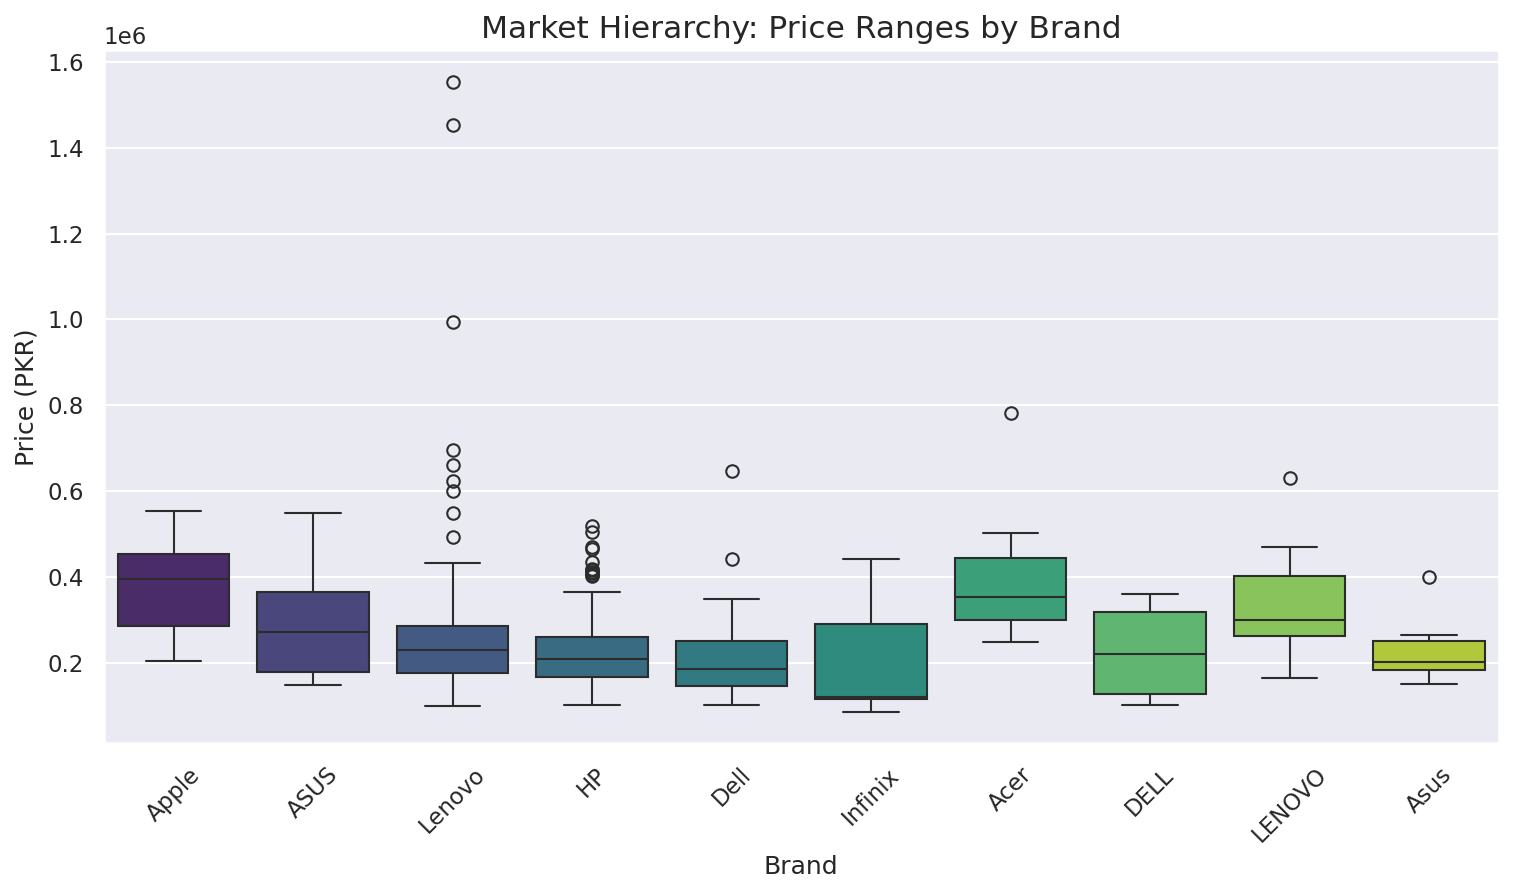

In [14]:
plt.figure(figsize=(12, 6))
# Filter for top 10 most common brands to keep chart clean
top_brands = df['Brand'].value_counts().nlargest(10).index
df_top = df[df['Brand'].isin(top_brands)]

sns.boxplot(x='Brand', y='Discounted Price', data=df_top, palette='viridis')
plt.title('Market Hierarchy: Price Ranges by Brand', fontsize=15)
plt.ylabel('Price (PKR)')
plt.xticks(rotation=45)
plt.show()

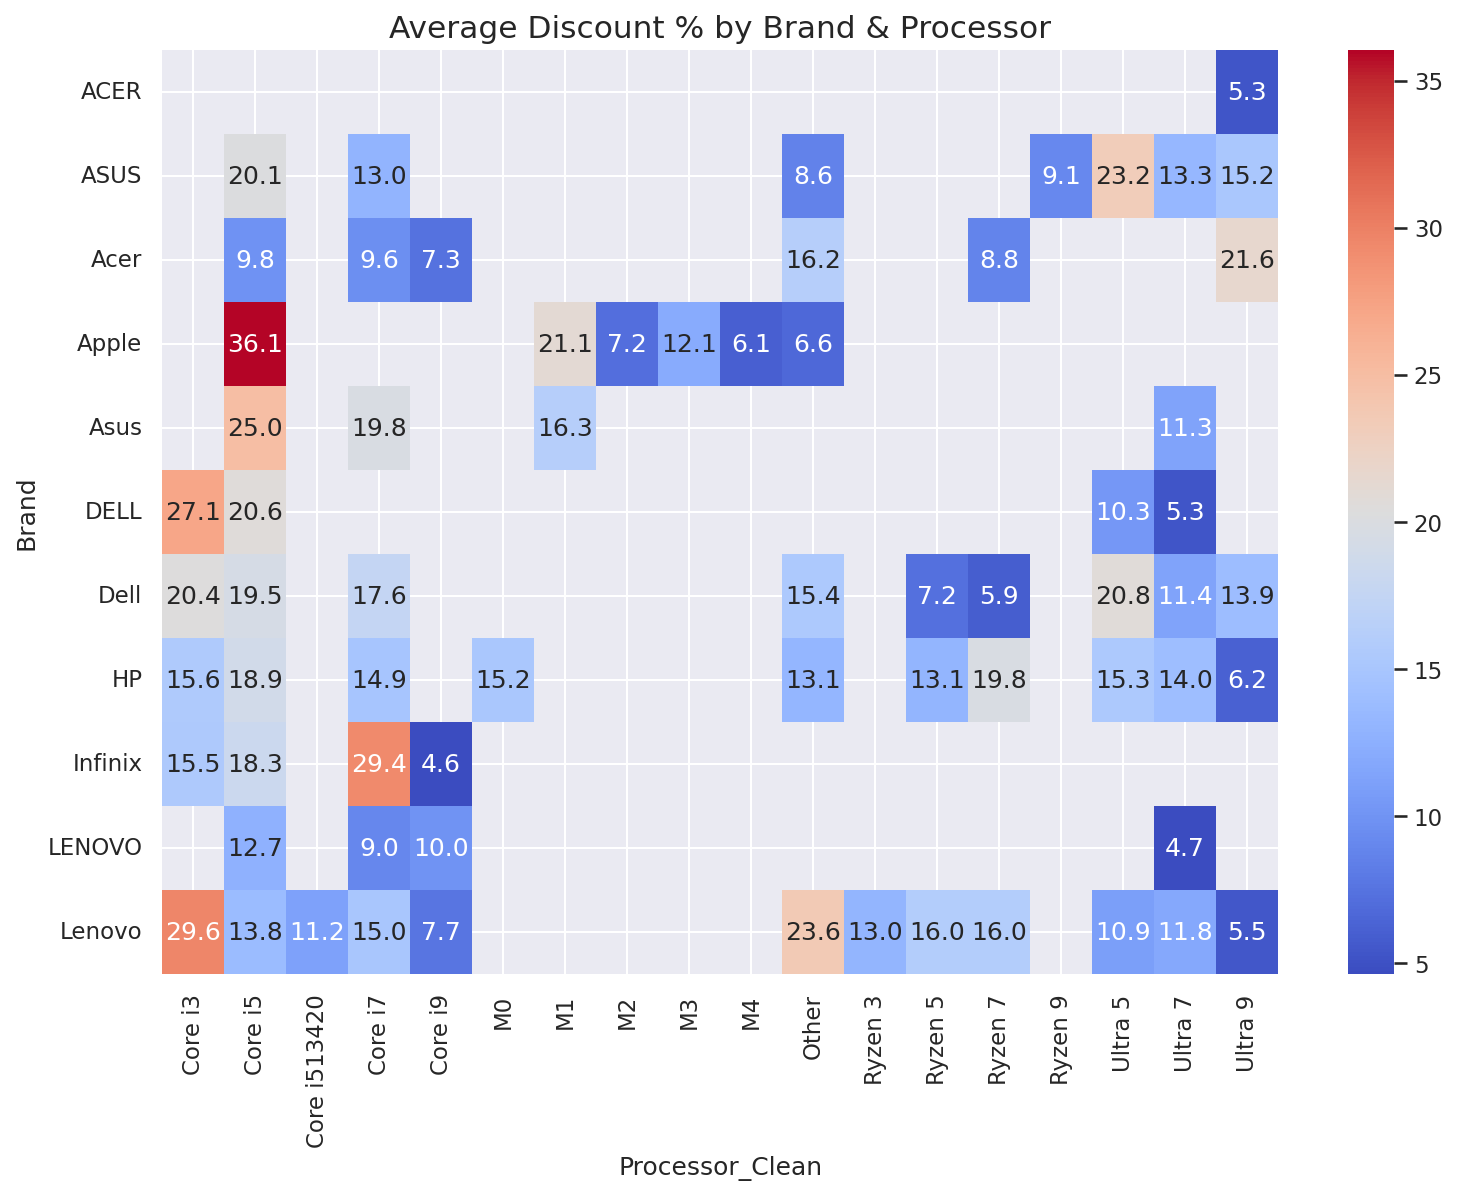

In [15]:
pivot = df.pivot_table(values='Discount_Pct', index='Brand', columns='Processor_Clean', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt='.1f')
plt.title('Average Discount % by Brand & Processor', fontsize=15)
plt.show()

# Feature Selection

In [16]:
# Prepare Data for Modeling
features = ['Brand', 'Processor_Clean']
target = 'Discounted Price'

# Data Encoding

In [17]:
X = pd.get_dummies(df[features])
y = df[target]

# Train-Test Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Price Prediction Model

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor


models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=-1, random_state=42),
    "GradientBoosting":GradientBoostingRegressor(n_estimators=100, random_state=42)
}


results = {}
print("🤖 Training & Comparing Models...")
print("-" * 40)

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    results[name] = mae
    print(f"✅ {name:20} MAE: {mae:,.0f} PKR")

🤖 Training & Comparing Models...
----------------------------------------
✅ Linear Regression    MAE: 72,858 PKR
✅ Random Forest        MAE: 71,477 PKR
✅ XGBoost              MAE: 69,743 PKR
✅ GradientBoosting     MAE: 71,061 PKR


In [20]:
best_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=-1, random_state=42)
best_model.fit(X_train, y_train)
final_preds = best_model.predict(X_test)

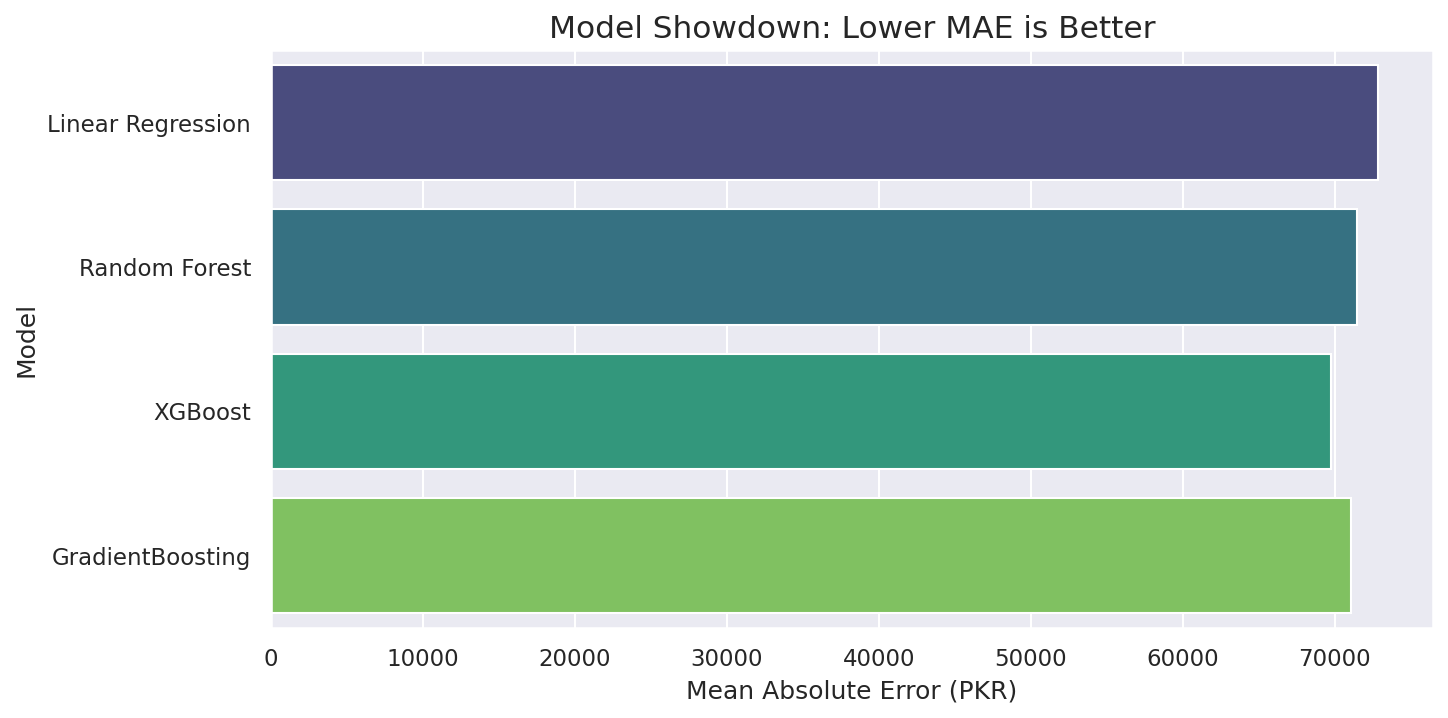

In [21]:
# 4. Visualize Models Performance
plt.figure(figsize=(10, 5))
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'MAE'])
sns.barplot(x='MAE', y='Model', data=results_df, palette='viridis')
plt.title('Model Showdown: Lower MAE is Better', fontsize=15)
plt.xlabel('Mean Absolute Error (PKR)')
plt.show()

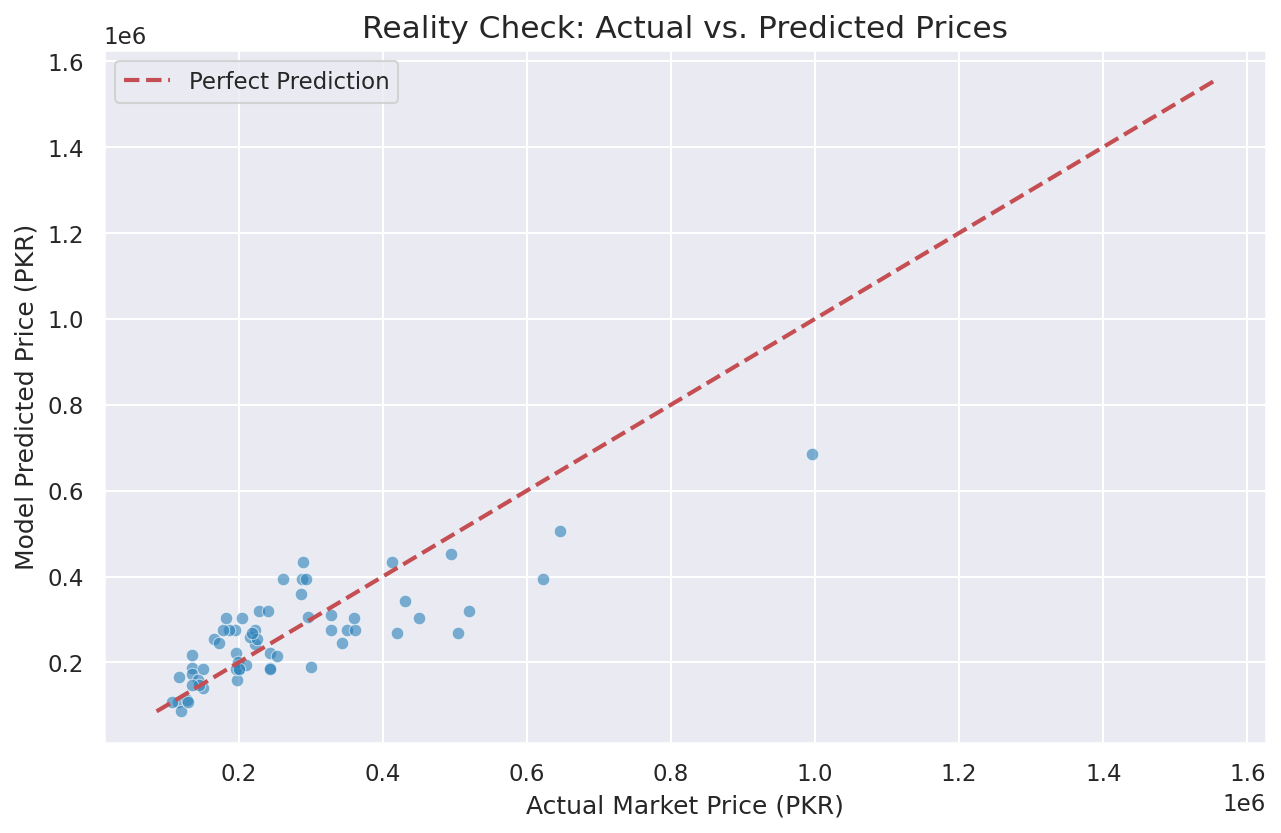

In [22]:
# 3. Residual Plot (Actual vs Predicted)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=final_preds, alpha=0.6, color='#2980b9')
# Perfect prediction line
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Prediction')
plt.title('Reality Check: Actual vs. Predicted Prices', fontsize=15)
plt.xlabel('Actual Market Price (PKR)')
plt.ylabel('Model Predicted Price (PKR)')
plt.legend()
plt.show()

# Feature Importance

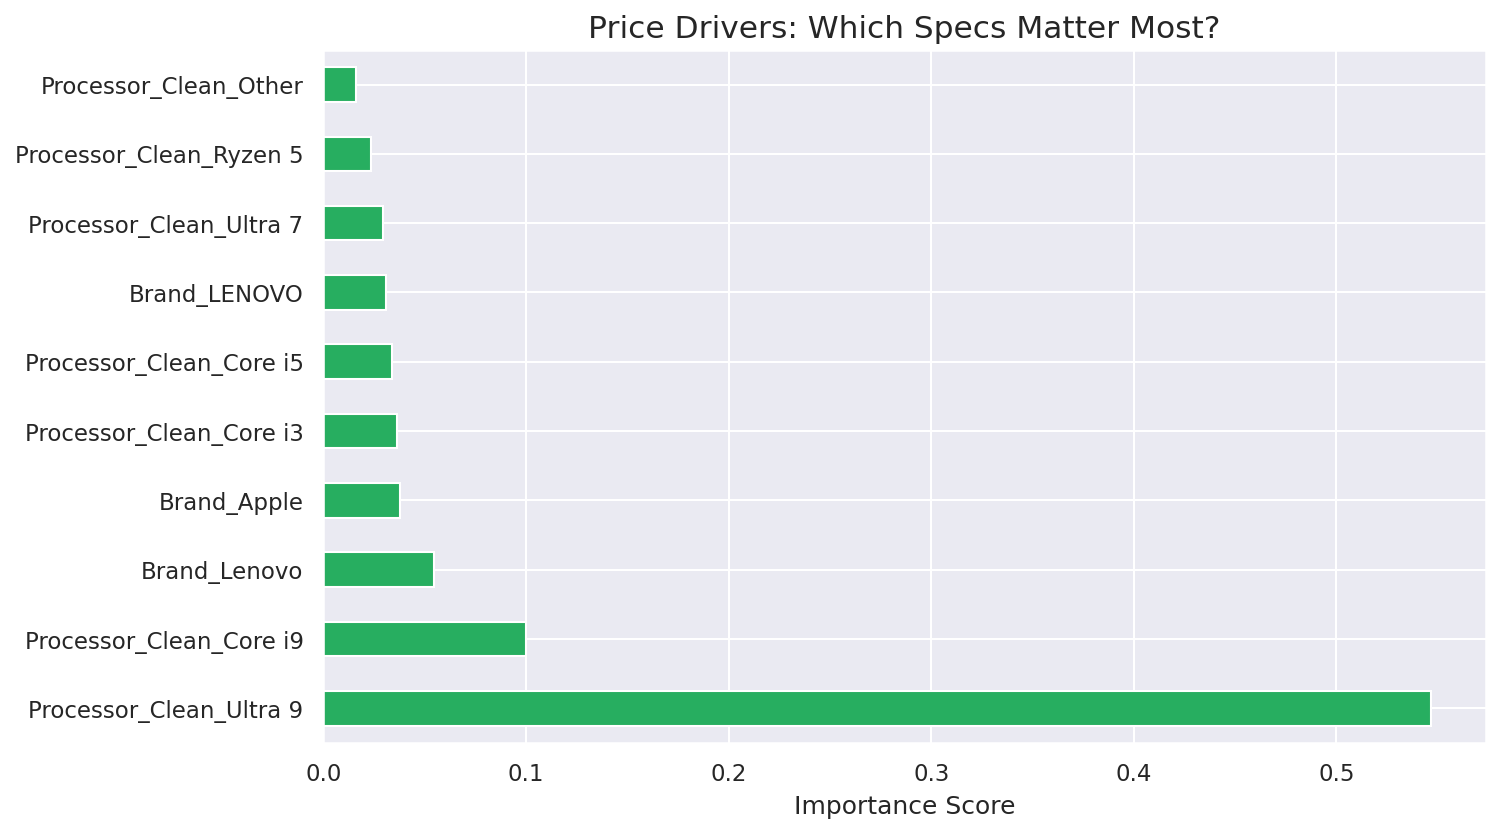

In [23]:
feat_imp = pd.Series(best_model.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh', color='#27ae60', figsize=(10, 6))
plt.title('Price Drivers: Which Specs Matter Most?', fontsize=15)
plt.xlabel('Importance Score')
plt.show()

# Thanks!